In [ ]:
!unzip -n archive.zip

### 1)

In [ ]:
from numpy.linalg import eig
from numpy import linalg as LA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from random import seed
from random import randrange
from math import sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image
from numpy import asarray
import cv2
import numpy as np
numpydata = [[[0 for k in range(10304)] for j in range(10)]for i in range(40)]  
## array of 40 x 10 = 400 cell each = vector of 10304 element
for i in range(1,41):
  for j in range(1,11):
    path = "/content/s"+str(i)+"/"+str(j)+".pgm"
    img = cv2.imread(path,0)  # 0 to indicate greyscale image
    numpydata[i-1][j-1] = asarray(img).flatten() ## flatten to convert 2D array to a vector

### 2)

In [ ]:
D = np.array(np.zeros((400, 10304)))  ## initialization of the matrix 400 x 10304
k = 0
for i in range(40):
  for j in range(10):
    D[k] =  np.asmatrix(numpydata[i][j]) ## take each cell image from numpydata to be a row in the matrix
    k = k + 1
y = np.array(np.zeros((400, 1)))
end = 0
for i in range(40):  ## labeled vector 400 x 1 , range of values 1:40
  start = end
  end = 10 + 10*i
  y[start:end] = i+1

### 3)

In [ ]:
# odd rows for training 200x10304
# even  rows for testing 200x10304
training=np.array(np.zeros((200,10304)))
testing=np.array(np.zeros((200,10304)))
ytesting=np.array(np.zeros((200,1)))
ytraining=np.array(np.zeros((200,1)))
j,k=0,0
for i in range (400):
  if (i%2==0):
    testing[j]=D[i]
    ytesting[j]=y[i]
    j=j+1
  else:
    training[k]=D[i]
    ytraining[k]=y[i]
    k=k+1

###PCA:

In [ ]:
startPCA = time.time()
# computing the mean:
meanVect = np.mean(training, axis=0)
# computing centered data:
zTrain = training - meanVect
# computing covariance matrix:
# covariance = zTranspose*z / n
cov_matrix = np.dot(zTrain.T, zTrain)/10304
# calculating eigen values and eigen vector:
values, vector = np.linalg.eigh(cov_matrix)
indx=values.argsort()[::-1]   #[::-1] to take all the list in reverse order
values = values[indx]
vector = vector[:,indx]
# computing the fraction of total variance:
total_eigenvalues = sum(values)
r = np.array([0,0,0,0])
alpha = np.array([0.8, 0.85, 0.9, 0.95])
for x in range(4):
  fraction = 0
  for i in range(10304):
    fraction += values[i]
    if fraction/total_eigenvalues >= alpha[x]:
      r[x]=i+1
      break
# # reduced basis:
U1 = vector[:,:r[0]]
U2 = vector[:,:r[1]]
U3 = vector[:,:r[2]]
U4 = vector[:,:r[3]]
endPCA = time.time()
print("The time taken by PCA: ", endPCA - startPCA, "seconds")

The time taken by PCA:  305.0734724998474 seconds


In [ ]:
#b) projecting the training set:
ProjTrain1 = np.dot(zTrain, U1)
ProjTrain2 = np.dot(zTrain, U2)
ProjTrain3 = np.dot(zTrain, U3)
ProjTrain4 = np.dot(zTrain, U4)
# projecting the test set:
# computing the mean of test:
meanVectTest = np.mean(testing, axis=0)
# computing centered data:
zTest = testing - meanVectTest
ProjTest1 = np.dot(zTest, U1)
ProjTest2 = np.dot(zTest, U2)
ProjTest3 = np.dot(zTest, U3)
ProjTest4 = np.dot(zTest, U4)

In [ ]:
accuracy_pca = np.array([0,0,0,0])
knn_pca = KNeighborsClassifier(n_neighbors=1,weights='distance')
knn_pca.fit(ProjTrain1, ytraining)
pca_pred1 = knn_pca.predict(ProjTest1)
accuracy_pca1 = accuracy_score(ytesting, pca_pred1)

knn_pca.fit(ProjTrain2, ytraining)
pca_pred2 = knn_pca.predict(ProjTest2)
accuracy_pca2 = accuracy_score(ytesting, pca_pred2)

knn_pca.fit(ProjTrain3, ytraining)
pca_pred3 = knn_pca.predict(ProjTest3)
accuracy_pca3 = accuracy_score(ytesting, pca_pred3)

knn_pca.fit(ProjTrain4, ytraining)
pca_pred4 = knn_pca.predict(ProjTest4)
accuracy_pca4 = accuracy_score(ytesting, pca_pred4)

print("At alpha = 0.8, Accuracy:", accuracy_pca1)
print("At alpha = 0.85, Accuracy:", accuracy_pca2)
print("At alpha = 0.9, Accuracy:", accuracy_pca3)
print("At alpha = 0.95, Accuracy:", accuracy_pca4)

At alpha = 0.8, Accuracy: 0.93
At alpha = 0.85, Accuracy: 0.935
At alpha = 0.9, Accuracy: 0.94
At alpha = 0.95, Accuracy: 0.935


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

##LDA:

In [ ]:
startLDA = time.time()
#class data
classlist=[]
for i in range (201):
  if (i%5==0 and i!=0):
    classlist.append(training[i-5:i,:])
sb=np.zeros((10304,10304))
sw=np.zeros((10304,10304))
b=np.zeros((1,10304))
overall_mean=np.mean(training,axis=0) #mean of training (𝜇) 1*10304
for i in range (40):
  mean=np.mean(classlist[i],axis=0)          # mean for class i (𝜇𝑘) 1*10304
  #sb
  b= mean-overall_mean                       #(𝜇𝑘−𝜇) 1*10304
  b.resize(10304,1)                             
  btrans=np.transpose(b)                # 1*10304
  sb+=5*(b@btrans)                        #(10304*1)*(1*10304)=10304*10304
  #sw
  z=classlist[i]-mean                         #centralized data for class i
  ztrans= np.transpose(z)
  sw+=ztrans@z
#get sw inverse
sinv=np.linalg.inv(sw)
# get sinv*sb
x=sinv@sb
#get eigenvalues and eigenvectors
eigenvalues,eigenvectors=np.linalg.eigh(x)
idx=eigenvalues.argsort()[::-1]   #[::-1] to take all the list in reverse order
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
endLDA = time.time()
print("The time taken by LDA = ", endLDA - startLDA, "seconds")

The time taken by LDA =  605.8511173725128 seconds


In [ ]:
projection=eigenvectors[:,0:39] # take first 39 eignvectors U 10304*39
#project training set using projection matrix
ztraining=training-overall_mean #200x10304
projecttrain=ztraining@projection #200x39
ztesting=testing-overall_mean
projecttest=ztesting@projection #200x39

In [ ]:
#first Nearest Neighbor to determine the class labels
knn_lda = KNeighborsClassifier(n_neighbors=1,weights='distance')
knn_lda.fit(projecttrain, ytraining)
lda_pred = knn_lda.predict(projecttest)
accuracy_lda = accuracy_score(ytesting, lda_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("Between class scatter matrix sb=\n",sb,"\n")

In [ ]:
print("within class scatter matrix sw=\n",sw,"\n")

In [ ]:
print("eigenvectors matrix U=\n",eigenvectors,"\n") #10304x10304

In [ ]:
print("projection matrix p=\n",projection,"\n")     #10304x39

In [ ]:
print("project train set =\n",projecttrain,"\n")

In [ ]:
print("project test set =\n",projecttest,"\n")

In [ ]:
print("Accuracy of LDA k=1 :\n", accuracy_lda*100)

Accuracy of LDA k=1 :
 94.5


##K-NN:

Accuracy @ K= 1 : 94.5 %
Accuracy @ K= 3 : 85.5 %
Accuracy @ K= 5 : 81.5 %
Accuracy @ K= 7 : 74.5 %


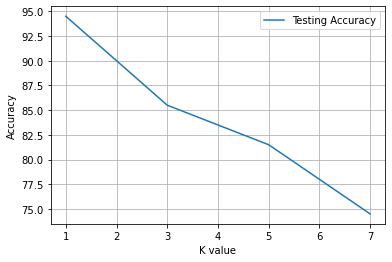

In [ ]:
x_train = training
y_train = ytraining.ravel()
x_test = testing
y_test = ytesting.ravel()

# Loop over K values
knn_array = [1,3,5,7]
train_accuracy = np.empty(len(knn_array))
test_accuracy = np.empty(len(knn_array))
test_accuracyLDA = np.empty(len(knn_array))
test_accuracyPCA =  np.zeros((4,4))

for i, k in enumerate(knn_array):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(x_train, y_train)	
	y_pred = knn.predict(x_test)
	test_accuracy[i] = accuracy_score(y_test, y_pred)*100 

# Generate plot  KNN
for i in range(4):
	print("Accuracy @ K=",knn_array[i],":", test_accuracy[i],"%")
plt.plot(knn_array, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

LDA Accuracy @ K= 1 : 94.5 %
LDA Accuracy @ K= 3 : 87.0 %
LDA Accuracy @ K= 5 : 84.0 %
LDA Accuracy @ K= 7 : 79.0 %


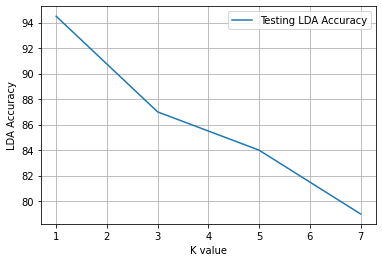

In [ ]:
for i, k in enumerate(knn_array):
	knnLDA = KNeighborsClassifier(n_neighbors=k)
	knnLDA.fit(projecttrain, ytraining.ravel())
	y_predLDA = knnLDA.predict(projecttest)
	test_accuracyLDA[i] = accuracy_score(ytesting.ravel(), y_predLDA)*100 
  
# Generate plot  LDA
for i in range(4):
	print("LDA Accuracy @ K=",knn_array[i],":", test_accuracyLDA[i],"%")
plt.plot(knn_array, test_accuracyLDA, label = 'Testing LDA Accuracy')
plt.legend()
plt.xlabel('K value')
plt.ylabel('LDA Accuracy')
plt.grid()
plt.show()

PCA Accuracy @ alpha= 0.8 @ K= 1 : 93.0 %
PCA Accuracy @ alpha= 0.85 @ K= 1 : 93.5 %
PCA Accuracy @ alpha= 0.9 @ K= 1 : 94.0 %
PCA Accuracy @ alpha= 0.95 @ K= 1 : 93.5 %


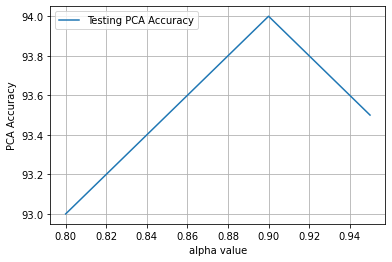

PCA Accuracy @ alpha= 0.8 @ K= 3 : 85.0 %
PCA Accuracy @ alpha= 0.85 @ K= 3 : 85.5 %
PCA Accuracy @ alpha= 0.9 @ K= 3 : 84.5 %
PCA Accuracy @ alpha= 0.95 @ K= 3 : 85.0 %


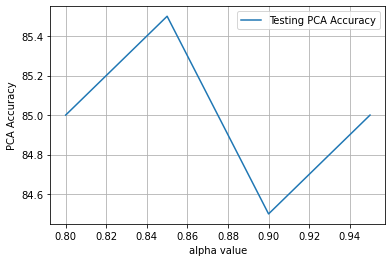

PCA Accuracy @ alpha= 0.8 @ K= 5 : 82.0 %
PCA Accuracy @ alpha= 0.85 @ K= 5 : 83.5 %
PCA Accuracy @ alpha= 0.9 @ K= 5 : 81.5 %
PCA Accuracy @ alpha= 0.95 @ K= 5 : 81.0 %


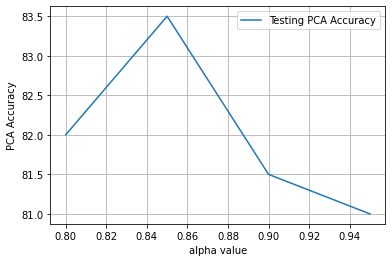

PCA Accuracy @ alpha= 0.8 @ K= 7 : 78.0 %
PCA Accuracy @ alpha= 0.85 @ K= 7 : 77.0 %
PCA Accuracy @ alpha= 0.9 @ K= 7 : 75.0 %
PCA Accuracy @ alpha= 0.95 @ K= 7 : 73.0 %


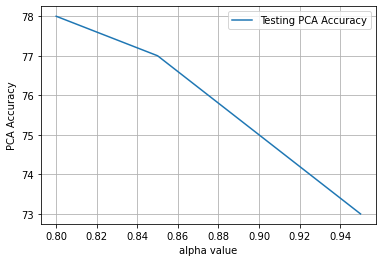

In [ ]:
for i, k in enumerate(knn_array):
	knnPCA = KNeighborsClassifier(n_neighbors=k)
	knnPCA.fit(ProjTrain1, ytraining.ravel())
	PCApred1 = knnPCA.predict(ProjTest1)
	test_accuracyPCA[i,0] = accuracy_score(ytesting, PCApred1)*100

	knnPCA = KNeighborsClassifier(n_neighbors=k)
	knnPCA.fit(ProjTrain2, ytraining.ravel())
	PCApred2 = knnPCA.predict(ProjTest2)
	test_accuracyPCA[i,1] = accuracy_score(ytesting, PCApred2)*100
 
	knnPCA = KNeighborsClassifier(n_neighbors=k)
	knnPCA.fit(ProjTrain3, ytraining.ravel())
	PCApred3 = knnPCA.predict(ProjTest3)
	test_accuracyPCA[i,2] = accuracy_score(ytesting, PCApred3)*100

	knnPCA = KNeighborsClassifier(n_neighbors=k)
	knnPCA.fit(ProjTrain4, ytraining.ravel())
	PCApred4 = knnPCA.predict(ProjTest4)
	test_accuracyPCA[i,3] = accuracy_score(ytesting, PCApred4)*100
  
# Generate plot  PCA
for i in range(4): #k 
	for j in range(4):
		print("PCA Accuracy @ alpha=",alpha[j],"@ K=",knn_array[i],":", test_accuracyPCA[i][j],"%")
	plt.plot(alpha,test_accuracyPCA[i,:], label = 'Testing PCA Accuracy')
	plt.legend()
	plt.xlabel('alpha value')
	plt.ylabel('PCA Accuracy')
	plt.grid()
	plt.show()